# Notebook supporting feature engineering and eda of test set

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
train_set_df: pd.DataFrame = pd.read_csv('../data/train.csv')

test_df: pd.DataFrame = pd.read_csv('../data/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [35]:
for col in test_df.columns:
    if pd.api.types.is_string_dtype(test_df[col].dtype):
        factorized_column = col + '_fact'
        train_set_df[col + '_fact'] = pd.factorize(train_set_df[col])[0]
        test_df[col + '_fact'] = pd.factorize(test_df[col])[0]
        train_set_df.drop(col.replace('_fact', ''), axis=1, inplace=True)
        test_df.drop(col.replace('_fact', ''), axis=1, inplace=True)

test_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType_fact,GarageFinish_fact,GarageQual_fact,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,0,-1,0,-1,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,0,-1,-1,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,1,0,0,0,-1,0,-1,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,1,0,0,0,-1,-1,-1,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,2,0,0,0,-1,-1,-1,0,0


# Comparing train & test

In [36]:
def compare_hist(feature: list[str]):
    fig, axes = plt.subplots(nrows=len(feature), ncols=2)
    train_set_df.hist(column=feature, legend=True, ax=axes[0])
    test_df.hist(column=feature, legend=True, ax=axes[1])

C:\Users\mikol\AppData\Local\Temp\ipykernel_21600\1079482215.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=len(feature), ncols=2)


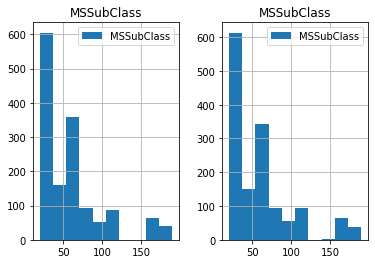

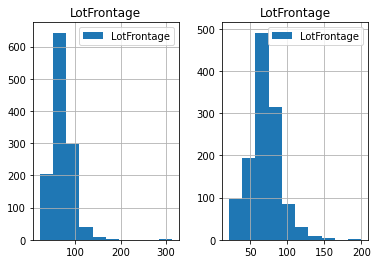

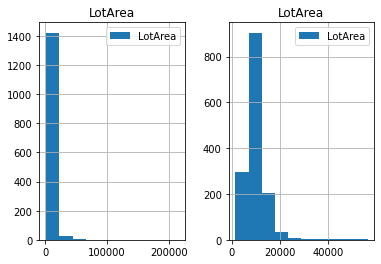

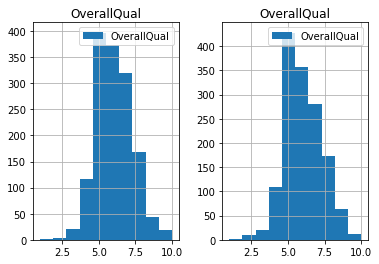

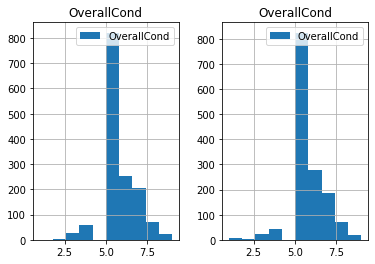

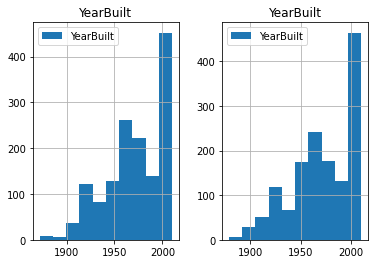

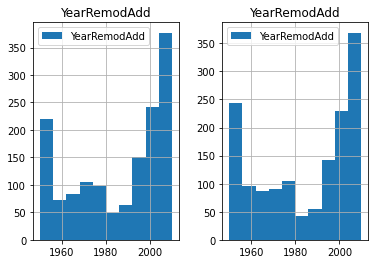

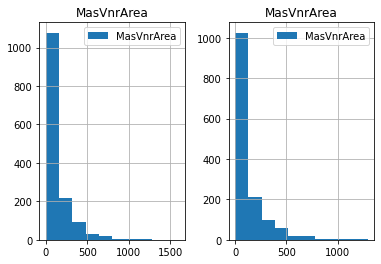

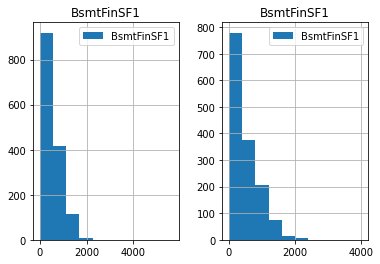

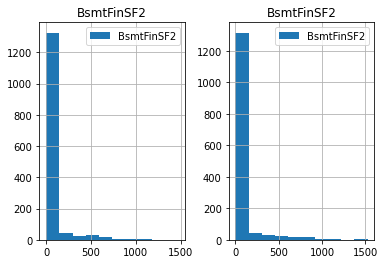

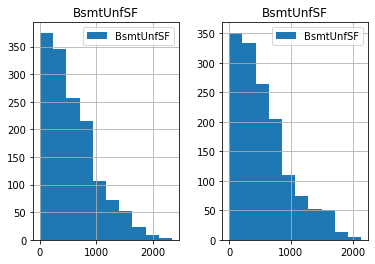

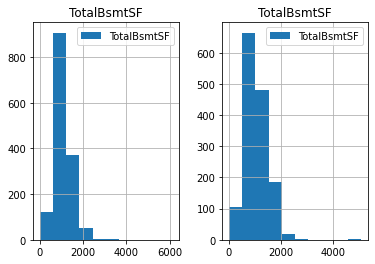

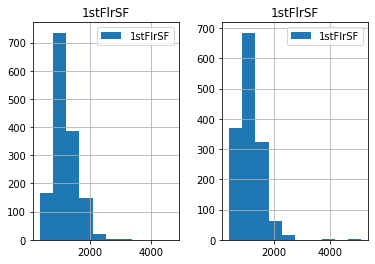

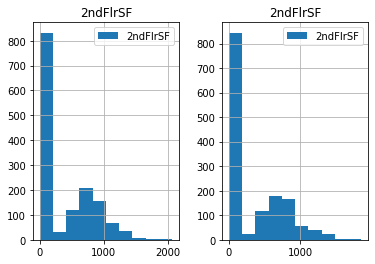

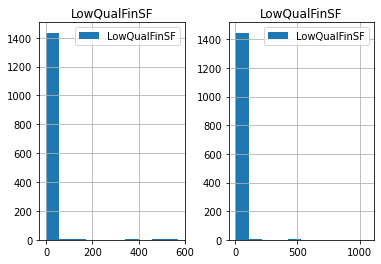

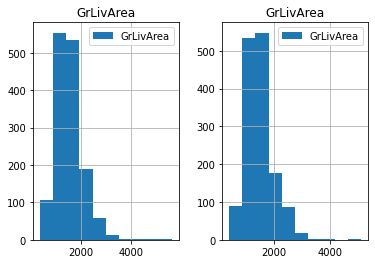

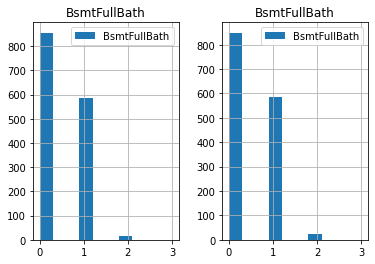

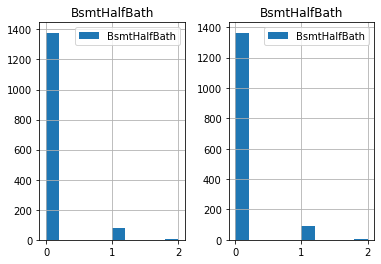

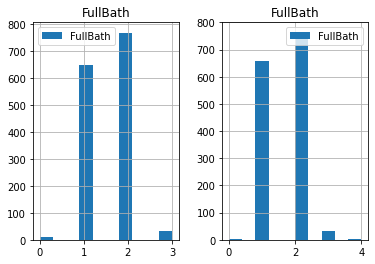

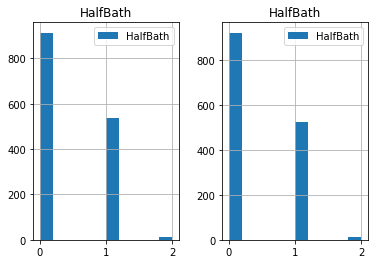

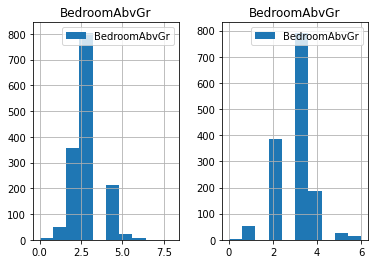

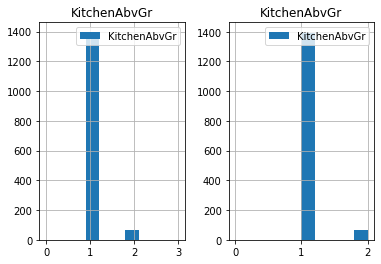

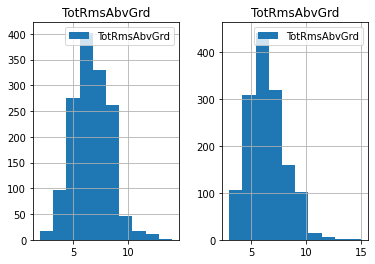

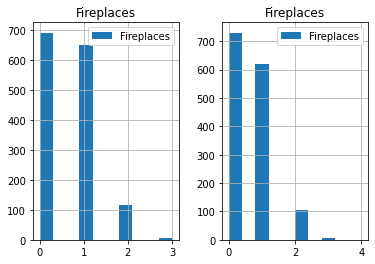

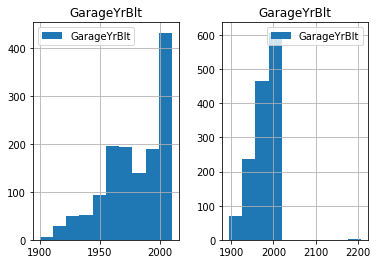

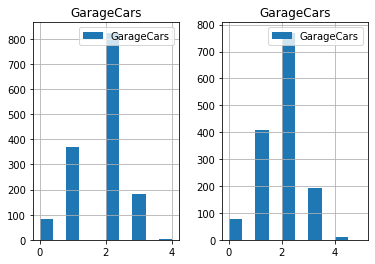

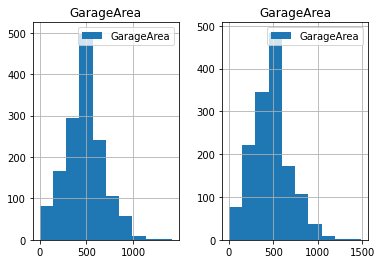

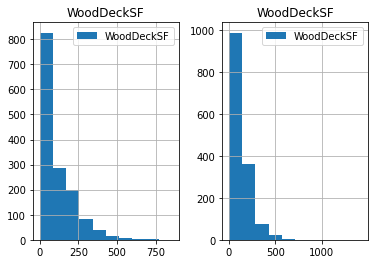

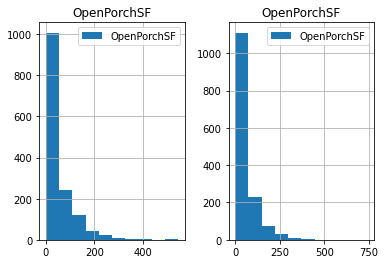

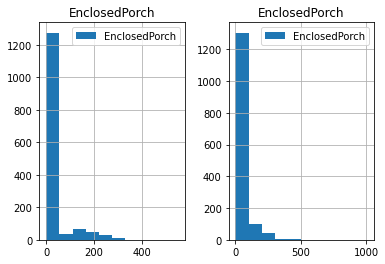

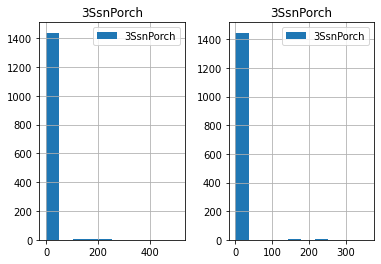

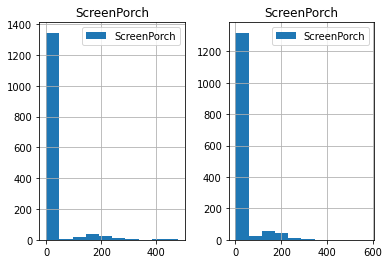

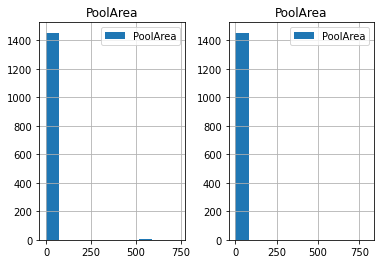

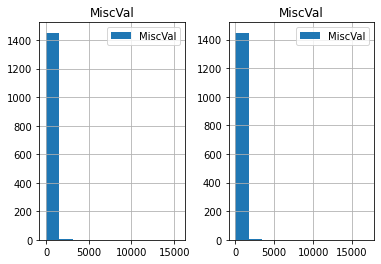

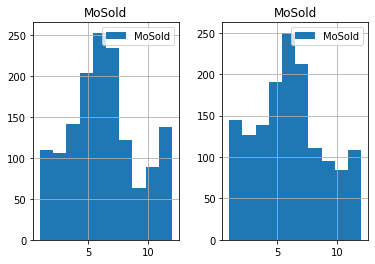

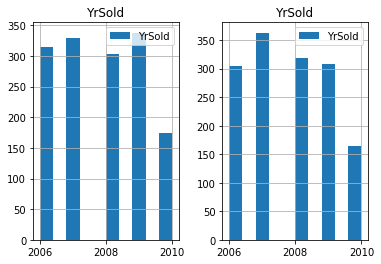

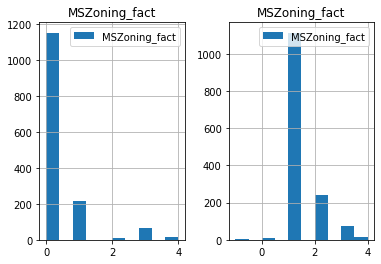

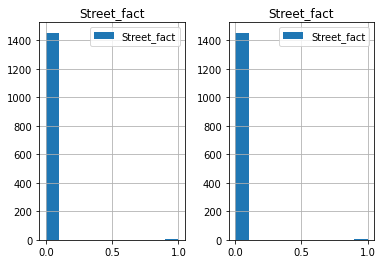

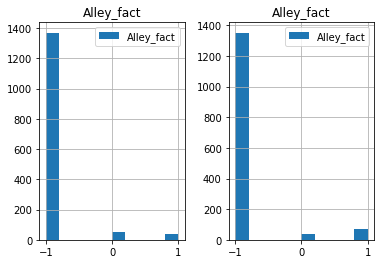

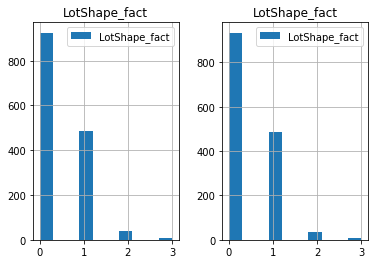

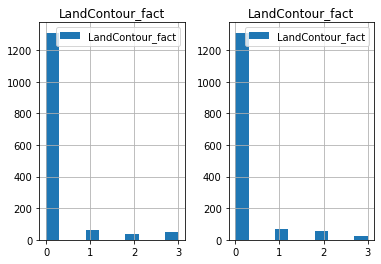

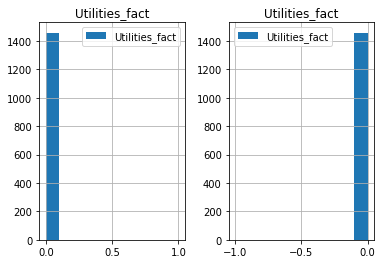

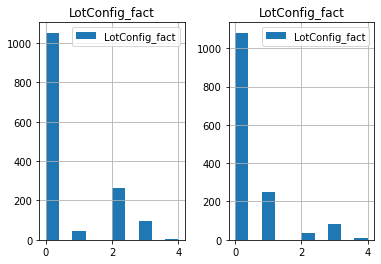

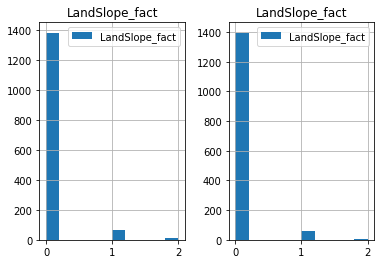

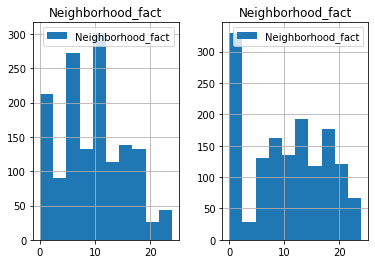

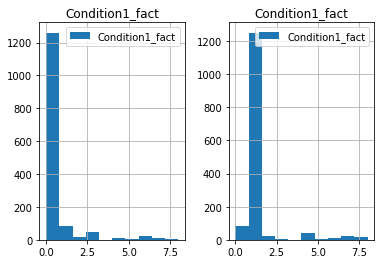

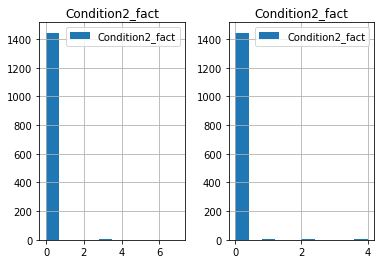

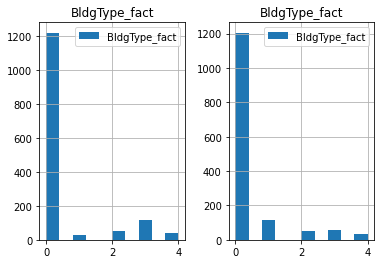

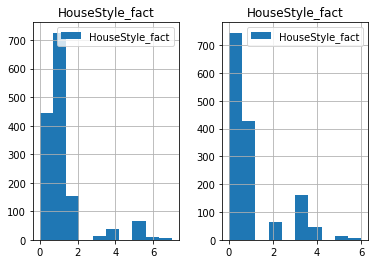

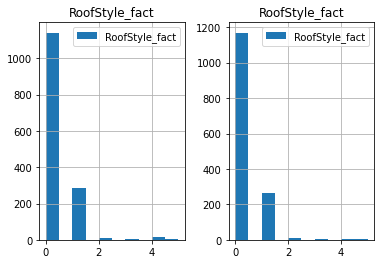

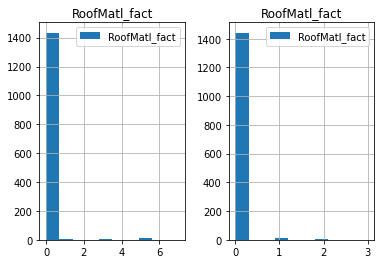

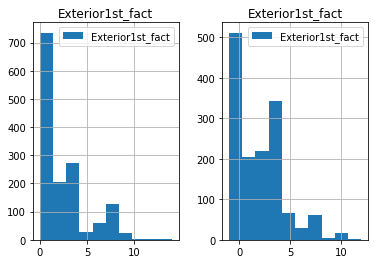

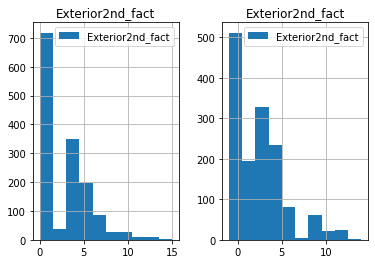

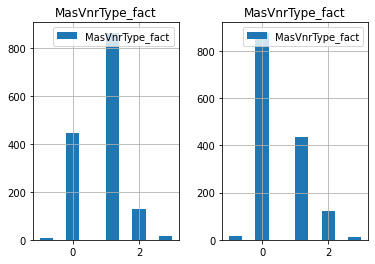

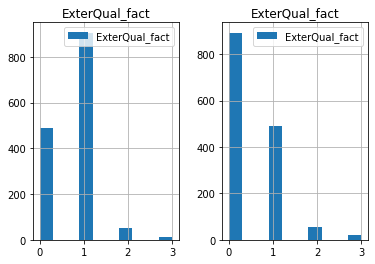

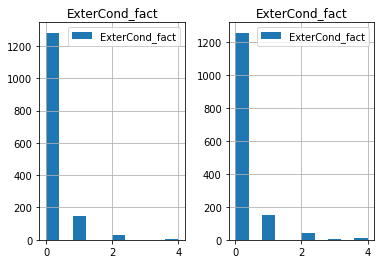

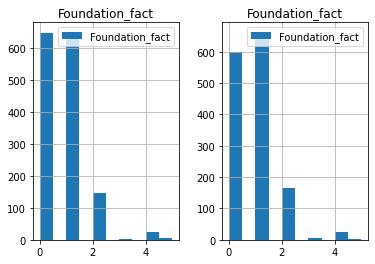

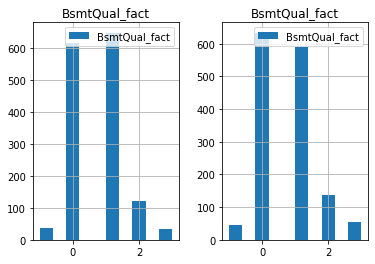

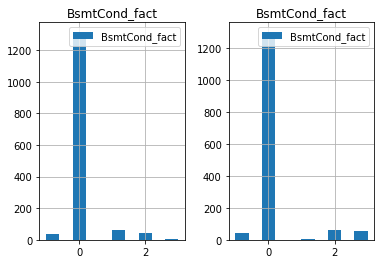

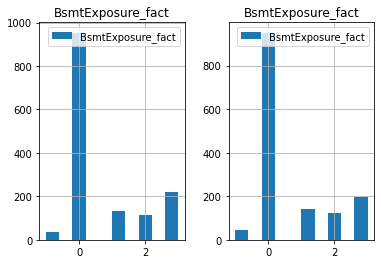

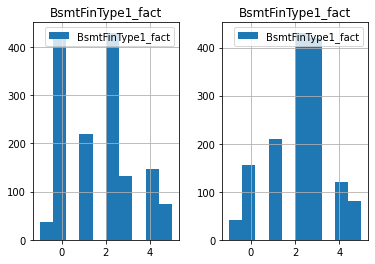

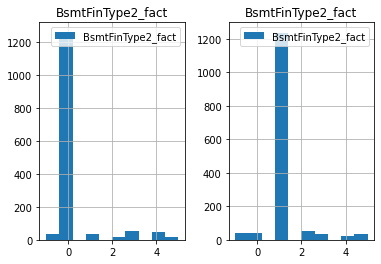

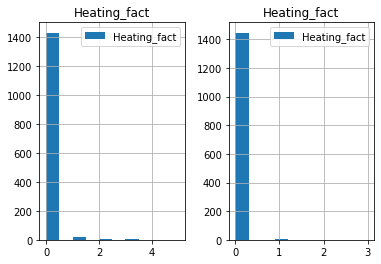

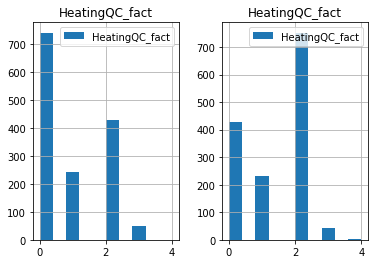

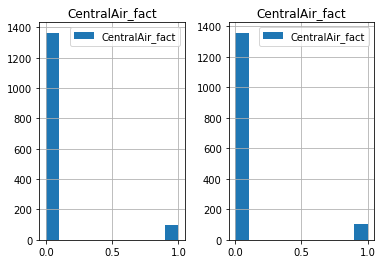

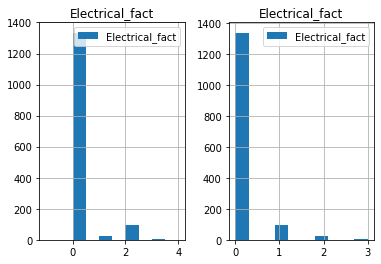

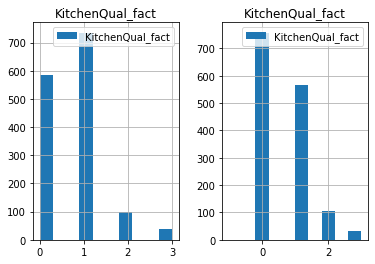

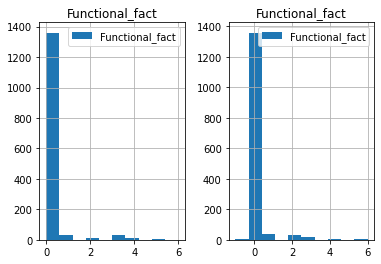

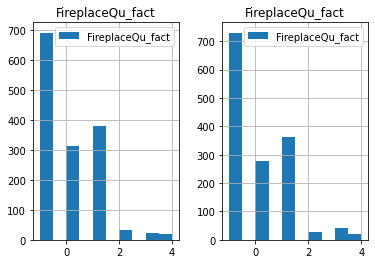

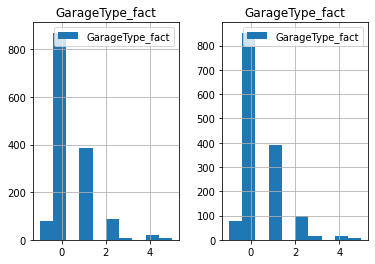

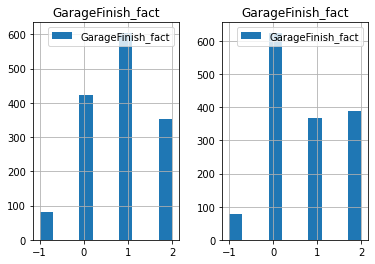

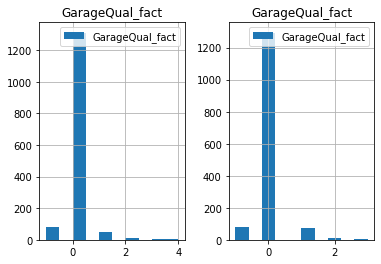

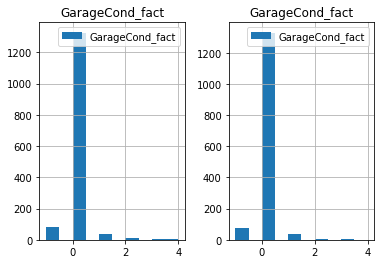

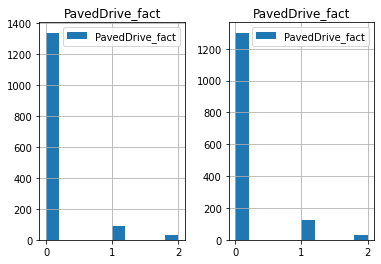

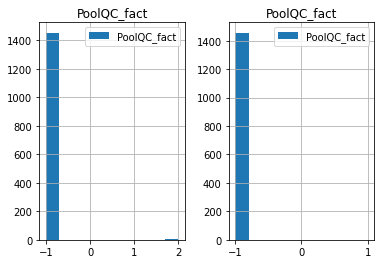

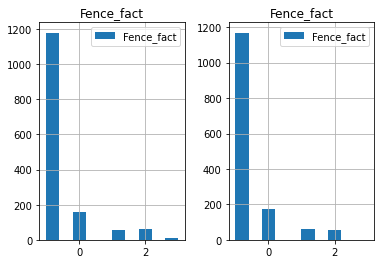

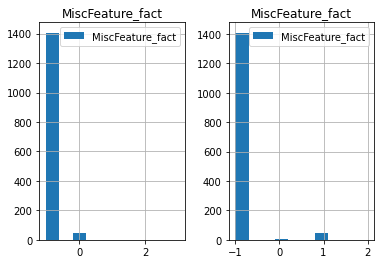

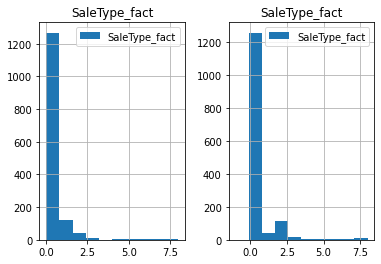

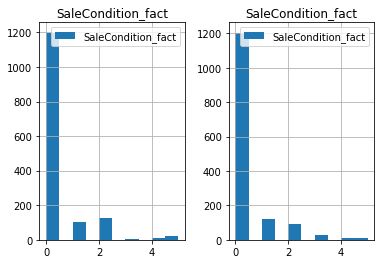

In [37]:
for col in test_df.columns[1:]:
    compare_hist([col])

##### Observations

- LotArea - very big training areas in train
- MasVnrArea - presence of values over 1500 only in train
- TotalBsmtSF - presence of values over 6000 only in train
- 2ndFlrSF - presence of values over 2000 only in train
- LowQualFinSF - presence of values over 1000 only in test
- BedrumAbvGr - 8 unique values in train, 6 unique values in test
- KitchenAbvGr - 3 unique values in train, 2 unique values in test
- Fireplaces - 3 unique values in train, 4 unique values in test
- OpenPorchSF/ EnclosedPorchSF / ScreenPorch - higher max values in test
- Utilities_fact - missing values in test
- Condition2_fact - 7 unique values in train, 4 unique values in test
- HouseStyle_fact - 7 unique values in train, 6 unique values in test
- RoofMatl_fact - 7 unique values in train, 3 unique values in test
- BsmFinType1_fact - more 0s values in train, more 3s in test
- Heating_fact - 5 unique values in train, 3 unique values in test
- Electrical_fact - 4 unique values in train, 3 unique values in test
- GarageQual_fact - 4 unique values in train, 3 unique values in test
- PoolQC_fact - 2 unique values in train, 1 unique values in test
- MiscFeature_fact - 3 unique values in train, 2 unique values in test
- GarageYrBlt for test set has incorrect value (year 2200)

Unique above means higher than 0.